In [1]:
import sys
sys.path.append('..')

In [18]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib import image as img

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *

from config import load_train_data

In [3]:
x, y = load_train_data()

x.shape, y.shape

100%|██████████| 1000/1000 [00:13<00:00, 72.42it/s]


((1000, 240, 320, 3), (1000, 7))

In [4]:
x_flattened = x.reshape(x.shape[0], -1)

x_flattened.shape

(1000, 230400)

In [5]:
pca = PCA(n_components=600)
x_pca = pca.fit_transform(x_flattened)

x_pca.shape

(1000, 600)

In [9]:
x_approx = pca.inverse_transform(x_pca)
x_approx = MinMaxScaler().fit_transform(x_approx)
x_approx = x_approx.reshape(x.shape)

x_approx.shape

(1000, 240, 320, 3)

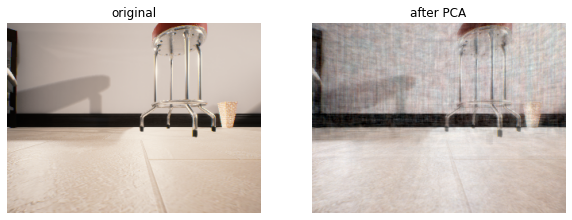

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10, 4)

ax1.imshow(x[0])
ax1.axis('off')
ax1.set_title('original')

ax2.imshow(x_approx[0])
ax2.axis('off')
ax2.set_title('after PCA');

In [13]:
x_pca_scaled = MinMaxScaler().fit_transform(x_pca)
y_scaled = MinMaxScaler().fit_transform(y)

x_pca_scaled.shape, y_scaled.shape

((1000, 600), (1000, 7))

In [19]:
model = MultiOutputRegressor(LinearRegression())

In [26]:
cross_val_score(model, x_pca_scaled, y_scaled, scoring=make_scorer(mean_squared_error), cv=5).mean()

0.10379396084390806